In [1]:
from sys import path as sp
from pathlib import Path
from os import path


# Make scripts directory importable
sp.append(path.join((Path.cwd()).parent,"scripts"))

In [2]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from filepaths import paths

In [11]:
gyrofiles = list(paths.get('GYRO_DIR').glob('*'))
accelfiles = list(paths.get('ACCEL_DIR').glob('*'))

a_column = ['Subject_id', 'Activity_code', 'time', 'ax', 'ay', 'az']
g_column = ['Subject_id', 'Activity_code', 'time', 'gx', 'gy', 'gz']

In [12]:
# pd.read_csv(files[0])
files = []
files = gyrofiles.__add__(accelfiles)

for f in files:
    try:
        pd.read_csv(f)
    except:
        f.unlink()

In [13]:
for i in range(len(gyrofiles)):
    f_g = sorted(gyrofiles)[i]
    f_a = sorted(accelfiles)[i]
    tmp_dfg = pd.read_csv(f_g, names=g_column)
    tmp_dfa = pd.read_csv(f_a, names=a_column)
    # tmp_dfg = tmp_dfg.drop('time', axis=1)
    tmp_dfa = tmp_dfa.drop('time', axis=1).drop(['Subject_id', 'Activity_code'], axis=1)
    if i == 0: 
        full_df = pd.merge(tmp_dfg, tmp_dfa, left_index=True, right_index=True)
    elif i > 0:
        f_df = pd.merge(tmp_dfg, tmp_dfa, left_index=True, right_index=True)
        full_df = pd.concat([full_df, f_df], axis=0, join='outer')


full_df

,Subject_id,Activity_code,time,gx,gy,gz,ax,ay,az
0,1600,A,90426757696641,0.314944,-1.022277,-0.3099616;,7.091625,-0.591667,8.195502;
1,1600,A,90426807196641,0.387382,-0.618541,-0.048971802;,4.972757,-0.158317,6.6967316;
2,1600,A,90426856696641,0.070999,-0.209480,-0.1959783;,3.253720,-0.191835,6.107758;
3,1600,A,90426906196641,0.037975,0.254976,-0.1565635;,2.801216,-0.155922,5.997625;
4,1600,A,90426955696641,0.073129,0.719431,-0.0010349044;,3.770868,-1.051354,7.731027;
...,...,...,...,...,...,...,...,...,...
66551,1650,S,2426184371437252,-2.856065,2.057101,0.85393304;,4.378696,1.139490,15.968727;
66552,1650,S,2426184421424592,-2.911458,1.817417,1.2811041;,-2.475904,4.979790,8.115746;
66553,1650,S,2426184471411932,-3.015854,1.550036,2.0576818;,-7.972991,6.167314,4.160524;
66554,1650,S,2426184521399272,-3.218254,1.595842,3.0185504;,-7.111078,2.863316,4.4406457;


In [14]:
# Only keep A B D E G P R
# Walking Joggin Sitting Standing Brushing Dribbling Clapping
filt_df = full_df[full_df['Activity_code'].isin(['A','B','D','E','G','P','R'])]

# Remove ';' from the z coordinates and convert them back to float64
filt_df['az'] = filt_df['az'].str.slice(start=0, stop=-1)
filt_df['gz'] = filt_df['gz'].str.slice(start=0, stop=-1)
filt_df['az'] = filt_df['az'].astype('float')
filt_df['gz'] = filt_df['gz'].astype('float')

/var/folders/m6/ck_c1w1x74gdw0r9pf8n2knc0000gn/T/ipykernel_40037/897596826.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df['az'] = filt_df['az'].str.slice(start=0, stop=-1)
/var/folders/m6/ck_c1w1x74gdw0r9pf8n2knc0000gn/T/ipykernel_40037/897596826.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df['gz'] = filt_df['gz'].str.slice(start=0, stop=-1)
/var/folders/m6/ck_c1w1x74gdw0r9pf8n2knc0000gn/T/ipykernel_40037/897596826.py:8: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [15]:
Fs=20
activities = filt_df['Activity_code'].value_counts().index
activities

Index(['D', 'P', 'E', 'A', 'R', 'G', 'B'], dtype='object')

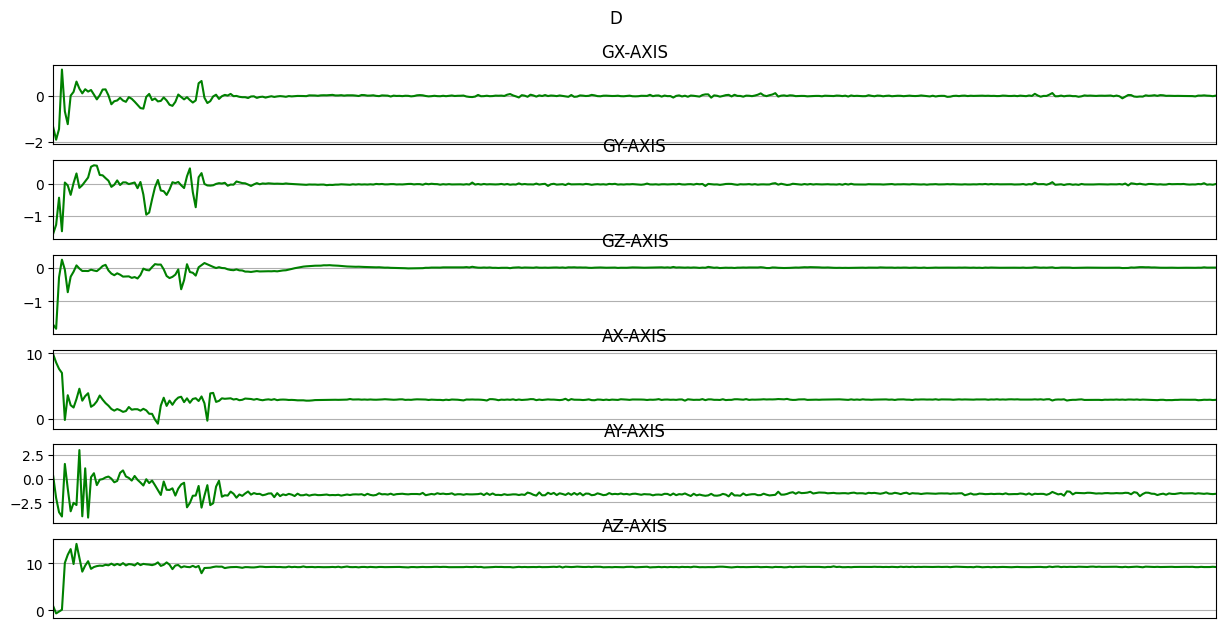

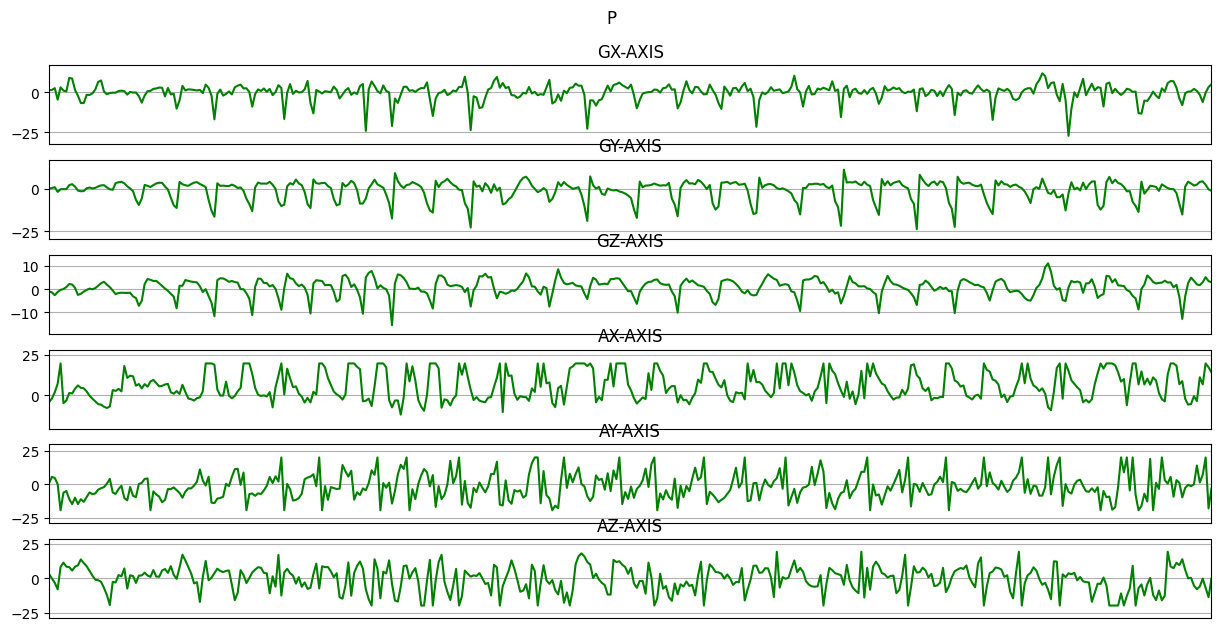

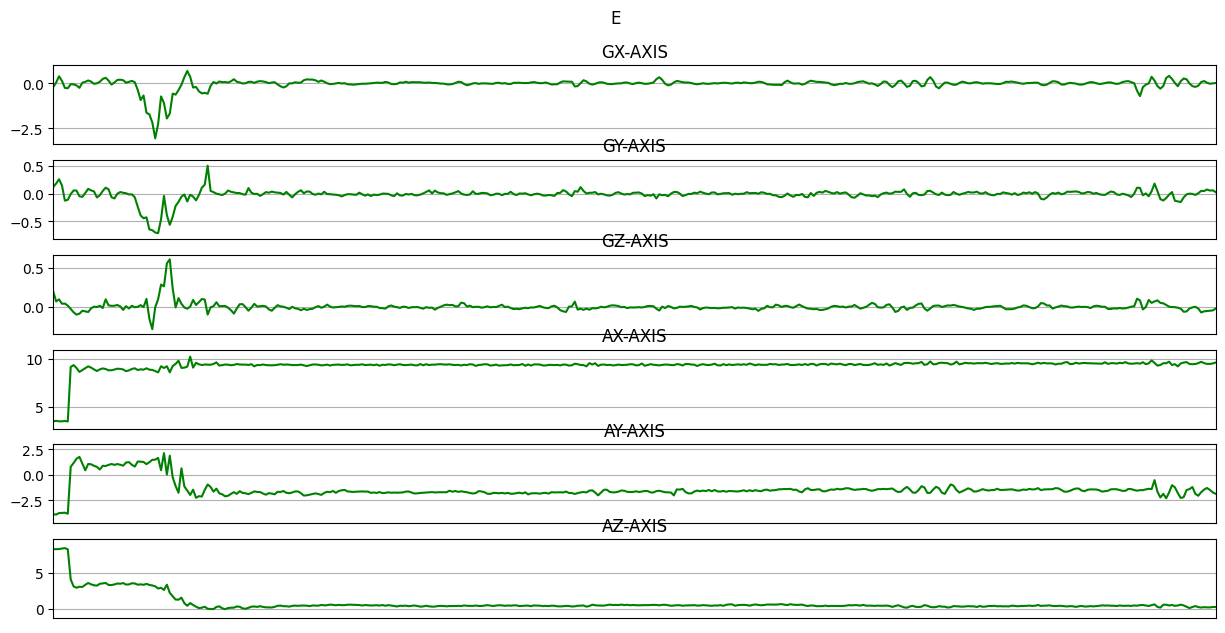

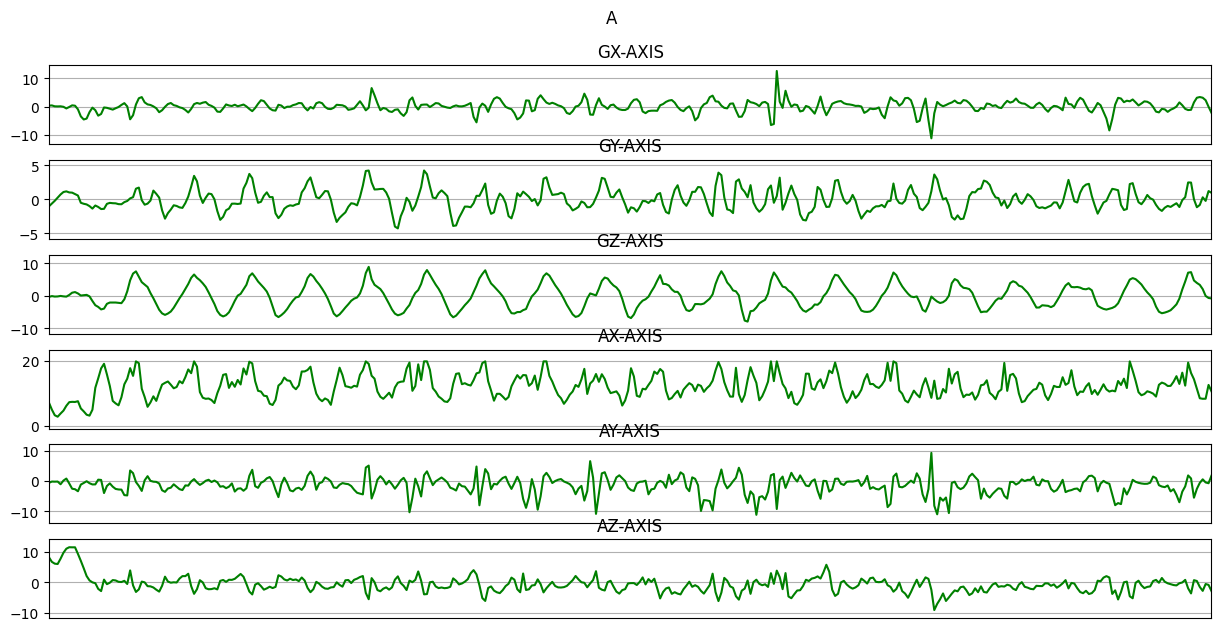

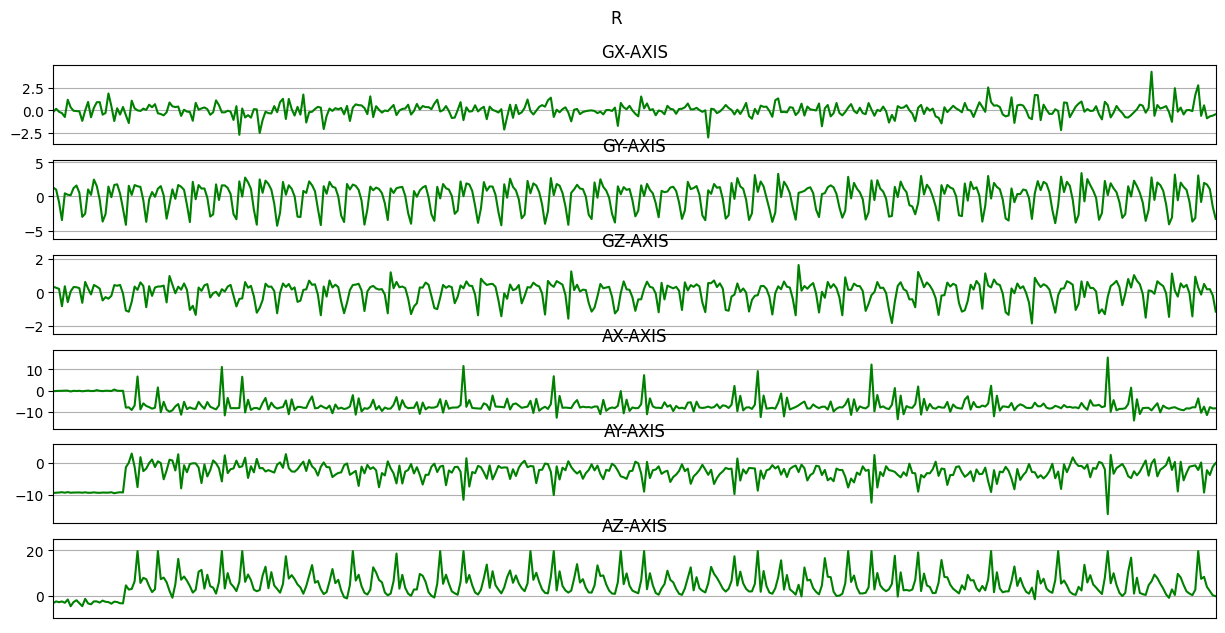

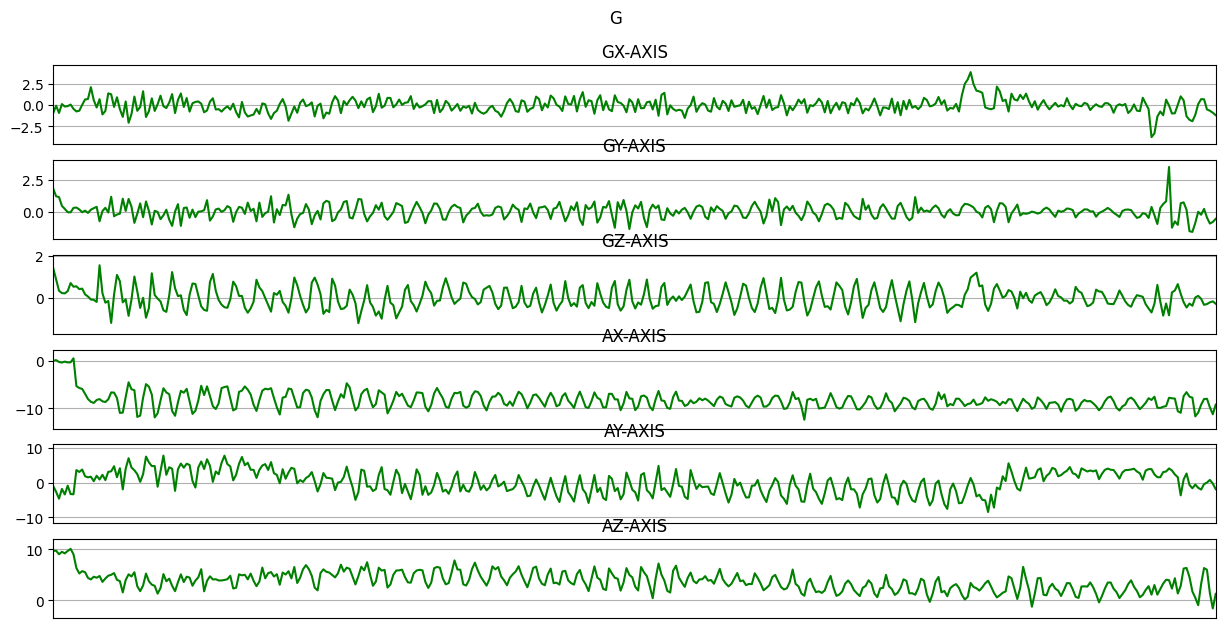

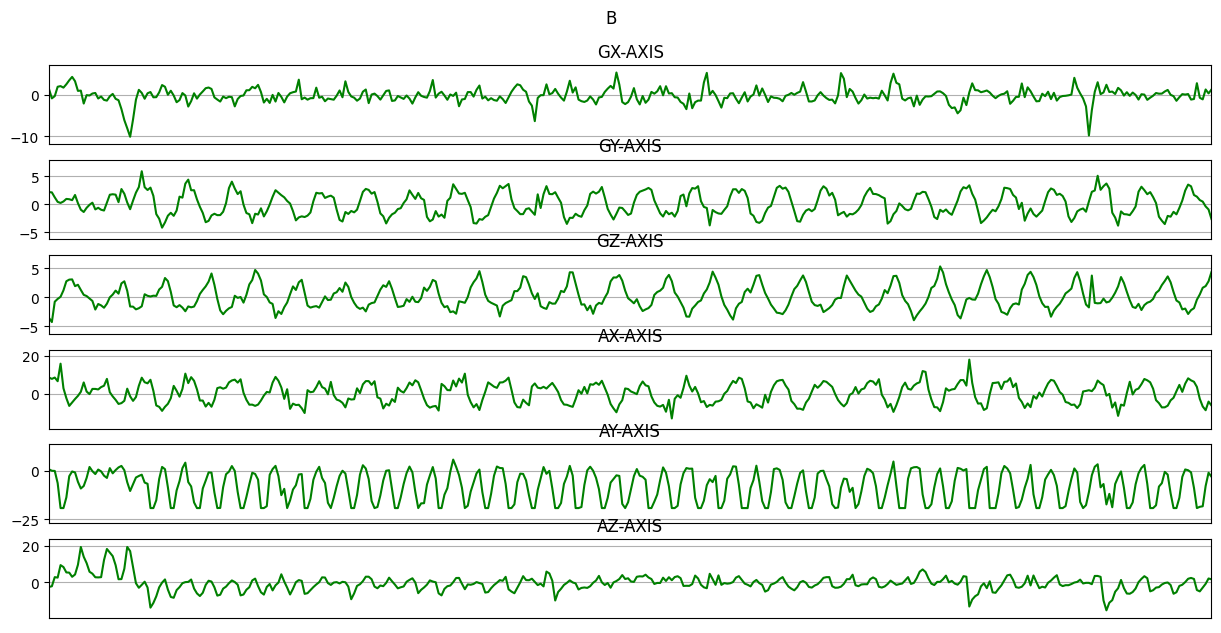

In [16]:
def plot_activity(activity, data):
    fig, (ax0, ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=6, figsize=(15,7), sharex=True)
    plot_axis(ax0, data['time'], data['gx'], 'GX-AXIS')
    plot_axis(ax1, data['time'], data['gy'], 'GY-AXIS')
    plot_axis(ax2, data['time'], data['gz'], 'GZ-AXIS')
    plot_axis(ax3, data['time'], data['ax'], 'AX-AXIS')
    plot_axis(ax4, data['time'], data['ay'], 'AY-AXIS')
    plot_axis(ax5, data['time'], data['az'], 'AZ-AXIS')
    
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, x, y, title):
    ax.plot(x, y,'g')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for activity in activities:
    data_for_plot = filt_df[(filt_df['Activity_code'] == activity)][:Fs*20]
    plot_activity(activity, data_for_plot)


In [17]:
filt_df = filt_df.drop('Subject_id', axis=1)
filt_df = filt_df.drop('time', axis=1)

In [3]:
import tensorflow as tf
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [18]:
label = LabelEncoder()
filt_df['label'] = label.fit_transform(filt_df['Activity_code'])
filt_df.head()

,Activity_code,gx,gy,gz,ax,ay,az,label
0,A,0.314944,-1.022277,-0.309962,7.091625,-0.591667,8.195502,0
1,A,0.387382,-0.618541,-0.048972,4.972757,-0.158317,6.696732,0
2,A,0.070999,-0.209480,-0.195978,3.253720,-0.191835,6.107758,0
3,A,0.037975,0.254976,-0.156563,2.801216,-0.155922,5.997625,0
4,A,0.073129,0.719431,-0.001035,3.770868,-1.051354,7.731027,0


In [19]:
label.classes_

array(['A', 'B', 'D', 'E', 'G', 'P', 'R'], dtype=object)

In [13]:
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

# Checked minmax of gyro to scale from -35 to 35 and accel from -80 to 80
filt_df.apply(minMax)

,Activity_code,gx,gy,gz,ax,ay,az,label
min,A,-34.858818,-32.900143,-20.932430,-70.63152,-78.477610,-78.477610,0
max,R,34.898952,25.071970,15.439269,52.11323,35.601967,66.615074,6


In [20]:
# Scale data to normalize data
def scale_g(x):
    return (x + 35)/70

def scale_a(x):
    return (x + 80)/160

In [21]:
filt_df['gx'] = filt_df['gx'].apply(scale_g)
filt_df['gy'] = filt_df['gy'].apply(scale_g)
filt_df['gz'] = filt_df['gz'].apply(scale_g)
filt_df['ax'] = filt_df['ax'].apply(scale_a)
filt_df['ay'] = filt_df['ay'].apply(scale_a)
filt_df['az'] = filt_df['az'].apply(scale_a)

filt_df

,Activity_code,gx,gy,gz,ax,ay,az,label
0,A,0.504499,0.485396,0.495572,0.544323,0.496302,0.551222,0
1,A,0.505534,0.491164,0.499300,0.531080,0.499011,0.541855,0
2,A,0.501014,0.497007,0.497200,0.520336,0.498801,0.538173,0
3,A,0.500543,0.503643,0.497763,0.517508,0.499025,0.537485,0
4,A,0.501045,0.510278,0.499985,0.523568,0.493429,0.548319,0
...,...,...,...,...,...,...,...,...
62952,R,0.493835,0.503790,0.497924,0.483403,0.453447,0.511952,6
62953,R,0.494612,0.509710,0.497803,0.478196,0.466405,0.553252,6
62954,R,0.494292,0.521367,0.498305,0.480321,0.447192,0.505623,6
62955,R,0.499314,0.510608,0.498411,0.486725,0.449646,0.538708,6


In [22]:
ds_X = filt_df[['gx','gy','gz','ax','ay','az']]
ds_Y = filt_df['label']

scaled_X = pd.DataFrame(data=ds_X, columns=['gx','gy','gz','ax','ay','az'])
scaled_X['Activity_code'] = ds_Y.values

scaled_X

,gx,gy,gz,ax,ay,az,Activity_code
0,0.504499,0.485396,0.495572,0.544323,0.496302,0.551222,0
1,0.505534,0.491164,0.499300,0.531080,0.499011,0.541855,0
2,0.501014,0.497007,0.497200,0.520336,0.498801,0.538173,0
3,0.500543,0.503643,0.497763,0.517508,0.499025,0.537485,0
4,0.501045,0.510278,0.499985,0.523568,0.493429,0.548319,0
...,...,...,...,...,...,...,...
62952,0.493835,0.503790,0.497924,0.483403,0.453447,0.511952,6
62953,0.494612,0.509710,0.497803,0.478196,0.466405,0.553252,6
62954,0.494292,0.521367,0.498305,0.480321,0.447192,0.505623,6
62955,0.499314,0.510608,0.498411,0.486725,0.449646,0.538708,6


In [23]:
import scipy.stats as stats

In [24]:
frame_size = Fs*1 # 20Hz * 4 = 80
hop_size = Fs*2

In [25]:
def get_frames(filt_df, frame_size, hop_size):
    N_FEATURES = 6

    frames = []
    labels = []
    for i in range(0, len(filt_df) - frame_size, hop_size):
        gx = filt_df['gx'].values[i: i + frame_size]
        gy = filt_df['gy'].values[i: i + frame_size]
        gz = filt_df['gz'].values[i: i + frame_size]
        ax = filt_df['ax'].values[i: i + frame_size]
        ay = filt_df['ay'].values[i: i + frame_size]
        az = filt_df['az'].values[i: i + frame_size]

        # Retrieve most often used label in this segment
        label = stats.mode(filt_df['Activity_code'][i: i + frame_size])[0][0]
        frames.append([gx,gy,gz,ax,ay,az])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels
        

In [26]:
x, y = get_frames(scaled_X, frame_size, hop_size)

/var/folders/m6/ck_c1w1x74gdw0r9pf8n2knc0000gn/T/ipykernel_40037/3498336246.py:15: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = stats.mode(filt_df['Activity_code'][i: i + frame_size])[0][0]


In [27]:
x.shape, y.shape

((33647, 20, 6), (33647,))

In [22]:
BUFFER_SIZE=x.shape[0]
BATCH_SIZE=64

# Turn numpy arrays into tf dataset
ds = tf.data.Dataset.from_tensor_slices(x)
# Cache te dataset
ds = ds.cache()
ds = ds.shuffle(BUFFER_SIZE)
ds = ds.batch(BATCH_SIZE)
# Reduce likelihood of bottlenecking
ds = ds.prefetch(int(BATCH_SIZE/2))

ds.as_numpy_iterator().next().shape

(64, 20, 6)

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [29]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((26917, 20, 6), (6730, 20, 6), (26917,), (6730,))

In [30]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

X_train.shape, X_test.shape


((26917, 20, 6, 1), (6730, 20, 6, 1))

### MODEL BUILD

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam


In [27]:
model = Sequential()
model.add(Conv2D(32, 3, activation='relu', input_shape = X_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(64, 3, activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(7, activation='softmax'))

In [28]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [37]:
history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_test, Y_test), verbose=1)

Epoch 1/20
842/842 [==============================] - 3s 4ms/step - loss: 0.3027 - accuracy: 0.8906 - val_loss: 0.3270 - val_accuracy: 0.9039
Epoch 2/20
842/842 [==============================] - 3s 4ms/step - loss: 0.2953 - accuracy: 0.8914 - val_loss: 0.3233 - val_accuracy: 0.9058
Epoch 3/20
842/842 [==============================] - 3s 4ms/step - loss: 0.3001 - accuracy: 0.8904 - val_loss: 0.3132 - val_accuracy: 0.9110
Epoch 4/20
842/842 [==============================] - 3s 4ms/step - loss: 0.3023 - accuracy: 0.8897 - val_loss: 0.3402 - val_accuracy: 0.8973
Epoch 5/20
842/842 [==============================] - 3s 4ms/step - loss: 0.3017 - accuracy: 0.8902 - val_loss: 0.3267 - val_accuracy: 0.9068
Epoch 6/20
842/842 [==============================] - 3s 4ms/step - loss: 0.2934 - accuracy: 0.8909 - val_loss: 0.3223 - val_accuracy: 0.9045
Epoch 7/20
842/842 [==============================] - 3s 4ms/step - loss: 0.2980 - accuracy: 0.8897 - val_loss: 0.3126 - val_accuracy: 0.9100
Epoch 

In [30]:
def plot_history(history, epochs):
    # Plot training & validation accuracy values
    epoch_range = range(1, epochs+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    # Plot training & Validation loss values
    epoch_range = range(1, epochs+1)
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()


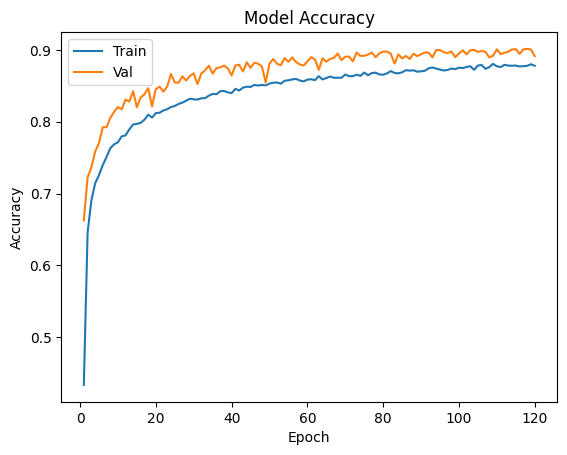

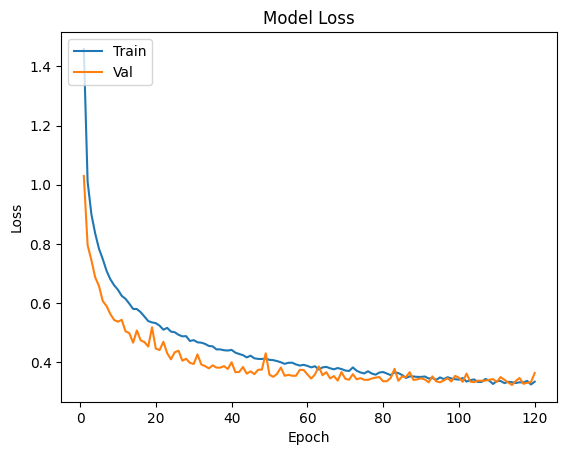

In [32]:
plot_history(history, 120)

In [33]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [38]:
y_pred = model.predict(X_test)
classes_y = np.argmax(y_pred,axis=1)

211/211 [==============================] - 0s 1ms/step


(<Figure size 800x800 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

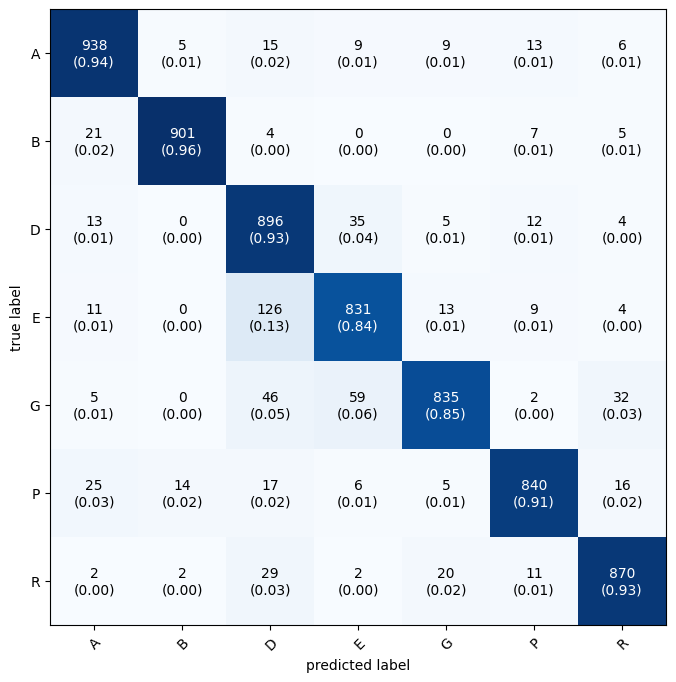

In [39]:
mat = confusion_matrix(Y_test, classes_y)
plot_confusion_matrix(conf_mat=mat, class_names=label.classes_, show_normed=True,figsize=(8,8))


In [40]:
model_name = 'model_1fs_002'
MODEL_DIR = Path(paths.get('MODEL_DIR'), f'{model_name}.h5')
model.save(MODEL_DIR)


In [7]:
model_name = 'model_1fs_002'
MODEL_DIR = Path(paths.get('MODEL_DIR'), f'{model_name}.h5')
model = tf.keras.models.load_model(MODEL_DIR)


In [10]:
model.weights

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[ 4.12473440e-01,  1.60343051e-02,  7.31494725e-02,
            1.22711565e-02, -3.55726182e-01, -3.56895387e-01,
           -2.51608789e-02, -5.76235294e-01, -3.78785402e-01,
            1.35838479e-01, -4.42919433e-02,  1.07746713e-01,
           -1.04593322e-01,  2.66303904e-02, -3.41750622e-01,
            1.73044682e-01, -1.64751001e-02, -4.42757905e-01,
            1.01138055e-01,  3.50008234e-02,  4.60441142e-01,
            1.10479565e-02, -6.70827031e-02, -9.82837602e-02,
            3.76289099e-01,  3.17856729e-01,  2.07875654e-01,
            1.11227296e-01, -9.95286331e-02, -6.77706227e-02,
            2.39178404e-01, -4.24121857e-01]],
 
         [[ 4.89650935e-01,  1.61339641e-02,  4.17134017e-02,
            1.09872045e-02, -1.12613894e-01, -1.05610192e-01,
           -6.87855110e-02, -5.81216991e-01,  6.55507818e-02,
           -1.57443702e-01, -1.16570458e-01, -2.79068142e-01,
         

In [31]:
X_test

array([[[[0.47774241],
         [0.48719283],
         [0.50131519],
         [0.50466317],
         [0.53161436],
         [0.53753419]],

        [[0.46174823],
         [0.51933338],
         [0.5265924 ],
         [0.48655367],
         [0.48352528],
         [0.49746475]],

        [[0.49918439],
         [0.46393936],
         [0.48104446],
         [0.47278105],
         [0.47392241],
         [0.49684081]],

        ...,

        [[0.52011316],
         [0.51909563],
         [0.52289642],
         [0.50948889],
         [0.50597241],
         [0.52195371]],

        [[0.47900772],
         [0.48222492],
         [0.48128221],
         [0.482195  ],
         [0.47854384],
         [0.48625017]],

        [[0.50232125],
         [0.51462147],
         [0.53581015],
         [0.53367033],
         [0.52160954],
         [0.509444  ]]],


       [[[0.45925589],
         [0.53607668],
         [0.53581797],
         [0.44583356],
         [0.44870977],
         [0.47858283]],

    

In [65]:
y_pred = model.predict(X_test[0:10])
classes_y = np.argmax(y_pred,axis=1)
classes_y

1/1 [==============================] - 0s 8ms/step


array([1, 1, 0, 2, 2, 5, 1, 5, 4, 1])

In [37]:
X_test[0]

array([[[0.47774241],
        [0.48719283],
        [0.50131519],
        [0.50466317],
        [0.53161436],
        [0.53753419]],

       [[0.46174823],
        [0.51933338],
        [0.5265924 ],
        [0.48655367],
        [0.48352528],
        [0.49746475]],

       [[0.49918439],
        [0.46393936],
        [0.48104446],
        [0.47278105],
        [0.47392241],
        [0.49684081]],

       [[0.50817827],
        [0.52756608],
        [0.51618562],
        [0.51880313],
        [0.50586777],
        [0.4809558 ]],

       [[0.46622472],
        [0.48874745],
        [0.46960313],
        [0.44516292],
        [0.44173886],
        [0.47034881]],

       [[0.51152889],
        [0.54004773],
        [0.5489503 ],
        [0.52542317],
        [0.52595581],
        [0.52183171]],

       [[0.53093211],
        [0.50773978],
        [0.48711931],
        [0.46388133],
        [0.48495804],
        [0.50315885]],

       [[0.51875736],
        [0.54062572],
        [0.5603026

In [39]:
model.predict(X_test[0:1])

1/1 [==============================] - 0s 9ms/step


array([[1.3294392e-27, 1.0000000e+00, 8.7063422e-36, 0.0000000e+00,
        0.0000000e+00, 1.7376639e-19, 0.0000000e+00]], dtype=float32)